1.Find and plot the decision boundary between class ω1 and ω2. Assume P(ω1) = P(ω2).

ω1 = [1,6; 3,4; 3,8; 5,6]

ω2 = [3,0; 1,-2;3,-4;5,-2]

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:


#Function to check whether the data falls under case 1
def isCase1(mat):
    first = mat[0][0]
    for i in range(1, len(mat)):
        if mat[i][i] != first:
            return False
    return True


#If the data falls under case-1 discriminant function is computed accordingly.
def linear_case1(w, pw, cov_mat):
    u1 = np.mean(w, axis=0)
    cov = cov_mat[0][0]
    weight = u1 / cov
    bias = np.log(pw) - 0.5 * np.transpose(u1) @ u1 / (cov ** 2)
    return weight, bias

#If the data falls under case-2 discriminant function is computed accordingly.
def linear_case2(w, pw, cov_mat):
    u1 = np.mean(w, axis=0)
    inv_cov = np.linalg.inv(cov_mat)
    weight = inv_cov @ u1
    bias = np.log(pw) - 0.5 * u1.T @ inv_cov @ u1
    return weight, bias

#If the data falls under case-3 discriminant function is computed accordingly.
def non_linear(w, pw, cov_mat):
    u1 = np.mean(w, axis=0)
    inv_cov = np.linalg.inv(cov_mat)
    weight1 = -0.5 * inv_cov
    weight2 = inv_cov @ u1
    bias = np.log(pw) - 0.5 * np.log(np.linalg.det(cov_mat)) - 0.5 * u1.T @ inv_cov @ u1
    return weight1, weight2, bias


#wieghts and biases are extracted from above functions by checking the cases for the given data.
def bayes_classifier(w1, w2, pw1, pw2):
    w1_cov = np.cov(w1, rowvar=False)
    w2_cov = np.cov(w2, rowvar=False)
    
    if np.allclose(w1_cov, w2_cov):
        weight1, bias1 = linear_case2(w1, pw1, w1_cov)
        weight2, bias2 = linear_case2(w2, pw2, w2_cov)
        return lambda x: (weight1 - weight2) @ x + (bias1 - bias2)
    elif isCase1(w1_cov) and isCase1(w2_cov):
        weight1, bias1 = linear_case1(w1, pw1, w1_cov)
        weight2, bias2 = linear_case1(w2, pw2, w2_cov)
        return lambda x: (weight1 - weight2) @ x + (bias1 - bias2)
    else:
        weight1_1, weight1_2, bias1 = non_linear(w1, pw1, w1_cov)
        weight2_1, weight2_2, bias2 = non_linear(w2, pw2, w2_cov)
        return lambda x: x.T @ (weight1_1 - weight2_1) @ x + np.dot(weight1_2 - weight2_2, x) + (bias1 - bias2)





In [38]:
w1 = np.array([[1, 6], [3, 4], [3, 8], [5, 6]])
w2 = np.array([[3, 0], [1, -2], [3, -4], [5, -2]])
pw1 = 0.5
pw2 = 0.5

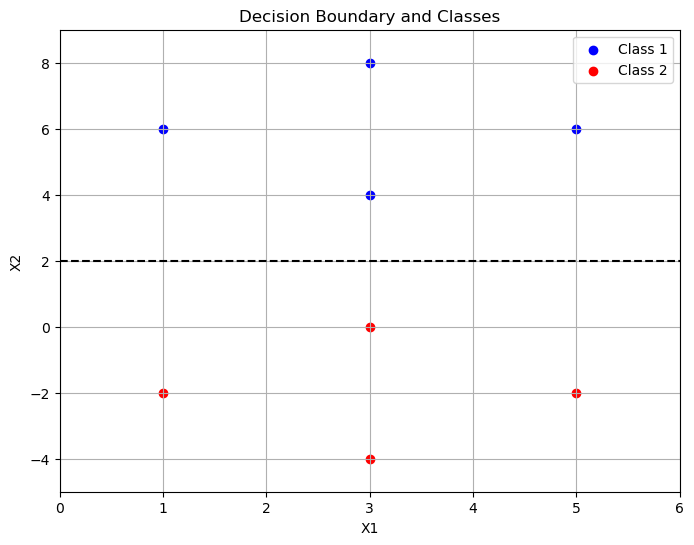

In [39]:
result = bayes_classifier(w1, w2, pw1, pw2)
x_min, x_max = min(np.min(w1[:,0]), np.min(w2[:,0])) - 1, max(np.max(w1[:,0]), np.max(w2[:,0])) + 1
y_min, y_max = min(np.min(w1[:,1]), np.min(w2[:,1])) - 1, max(np.max(w1[:,1]), np.max(w2[:,1])) + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# Evaluate the decision boundary difference f1 - f2 at each grid point
zz = np.zeros(xx.shape)
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        zz[i, j] = result(np.array([xx[i, j], yy[i, j]]))

#print(zz)

# Plotting the contour of the difference between f1 and f2
plt.figure(figsize=(8, 6))
plt.contour(xx, yy, zz, levels=[0], colors='k', linestyles='--')  # Decision boundary (f1 - f2 = 0)

# Plotting the points from w1 and w2
plt.scatter(w1[:, 0], w1[:, 1], color='blue', label='Class 1')
plt.scatter(w2[:, 0], w2[:, 1], color='red', label='Class 2')

# Plot details
plt.title('Decision Boundary and Classes')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)

plt.show()